# Acquire data from accelerometer from DAQ Board
## Callin Switzer
## python 3 (pyfly35 environment)
## 22 Jan 2017


Download nidaq driver for ni USB-6229 (save to thumb drive)

Download/update anaconda

download PyDAQmx

download pySerial (conda install pySerial)

upload code to Arduinos (001_Stepper_and_DCMotor)

# Setup

- import packages
- connect to arduino boards
- print system information and timestamp

In [1]:
from DataAcqUtils import *

3.5.4 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:15:17) [MSC v.1900 64 bit (AMD64)]
last run on 2018-07-17 16:10:47.656558
directory where data will be deposited: C:\Users\Combes4\Desktop\temp3\
_____________________________________________
connected to arduino on COM3
connected to arduino on COM5


# Test motors

In [2]:
# stepper only
written = ser1.write("s".encode("utf-8"))
written = ser2.write("s".encode("utf-8"))

In [3]:
# vibration motor only
written = ser1.write("v".encode("utf-8"))
written = ser2.write("v".encode("utf-8"))

Run the following cell until pollen comes out on every iteration

In [4]:
# both motors
written = ser1.write("sv".encode("utf-8"))
written = ser2.write("sv".encode("utf-8"))

# Test accelerometers

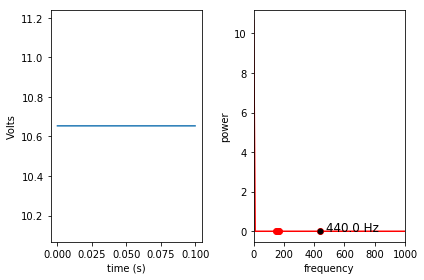

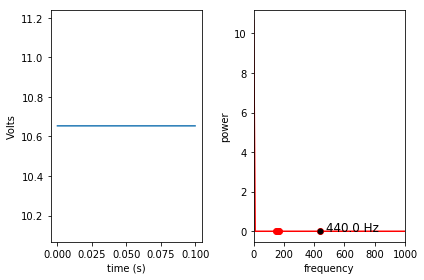

[None, None]

In [5]:
# test accelerometers
acc1 = accelDta("Dev2/ai0")
acc2 = accelDta("Dev2/ai1")
[j.readAccel() for j in [acc1, acc2]]
[k.FFT() for k in [acc1, acc2]]
[kk.plotFFT() for kk in [acc1, acc2]]

# Experimental Start

In [17]:
# determine the treatments
reward1, reward2 = randomAssignTreatment()

reward_1:True, reward_2:False


#### Change values in the next cell
---

In [18]:
# Recording program
# you fill in True/False here, for each trial
reward_1 = True
reward_2 = False


##____________________Don't change anything below_________________________##
# check rewards have been typed correctly
assert(reward1 == reward_1 and reward2 == reward_2), "Entered rewards do not match generated rewards"

# this function will time out after 5 min or 100 buzzes
# it will save data in the folder, "C:\\Users\\Combes4\\Desktop\\temp3\\"
trialFile = run_trial(reward_1, reward_2, acc1, acc2)

keyboard q pressed
now quitting loop
data saved to C:\Users\Combes4\Desktop\temp3\2018_07_17__16_11_39_895


# Post processing
___
#### Change values in the next cell
___

In [19]:
# post-processing 
colonyNum = 5
IT_span = 4.19 # in mm
Notes = "No pollen collected on corbicula." # leave as "", if there are no notes

#_____________________Don't change anything below____________________________#


# add colony number and ITspan and notes to csv file
fname = trialFile
csv_input = pd.read_csv(fname)
csv_input['colonyNum'] = colonyNum
csv_input['ITSpan_mm'] = IT_span
csv_input['Notes'] = Notes
csv_input.to_csv(fname, index=False)

# move videos from temp3 folder to trial folder
aviFiles = [f for f in os.listdir(os.path.dirname(os.path.dirname(trialFile))) if f.endswith(".avi")]

# move all avi files in TMP3 folder to sub folder
tmp = [shutil.move(os.path.join(os.path.dirname(os.path.dirname(trialFile)), aviFiles[ii]), 
             os.path.join(os.path.dirname(trialFile), aviFiles[ii])) for ii in range(len(aviFiles))]
print(str(len(tmp)) + " avi files moved")

csv_input.head()

0 avi files moved


,Amp_V,freq_Hz,accNum,rewardStatus,timestamp,treatment,colonyNum,ITSpan_mm,Notes


In [ ]:
# copy the main data file to dropbox
dropboxDir = "D:\\Dropbox\\UW\\ExperWinter2018\\BeeTwoFlowerChoiceData\\"

#fileToCopy =  r"C:\Users\Combes4\Desktop\temp3\2018_02_27__10_42_46_336\2018_02_27__10_42_46_336.csv"
fileToCopy =  trialFile

#refref double check file to copy
shutil.copy(fileToCopy, dropboxDir)

In [ ]:
# may do this by hand
# move the other data to the big hard drive (takes a little while)
# backupDir = 'D:\\BeeTwoFlowerExperiment\\'

# directoryToMove = os.path.dirname(fileToCopy)
# stt = time.time()
# shutil.move(directoryToMove, backupDir)
# print(np.round((time.time() - stt) / 60, 2), "minutes")

--- END ---